<a href="https://www.kaggle.com/code/hunhun2211/cake-detect?scriptVersionId=96118190" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Lê Đình Hùng 
#MSSV 19146016
#import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.utils import np_utils
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='../input/cake-data/banh',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='../input/cake-data/banh',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 68 images belonging to 4 classes.
Found 16 images belonging to 4 classes.


In [3]:
train_dataset.classes
train_dataset.class_indices

{'Banh xeo': 0, 'banh da lon': 1, 'banh hoi': 2, 'banh uot': 3}

In [4]:
import numpy as np  #
import pandas as pd # xu ly mang
import seaborn as sns # do thi
import matplotlib.pyplot as plt # ve do hoa
from sklearn.preprocessing import StandardScaler  # xu ly du lieu , du lieu k dong deu
from sklearn.model_selection import train_test_split # chia du lieu 
from keras.layers import Dense,Activation,Dropout,BatchNormalization,LSTM #  :batch... : chuan cua ANN
from keras.models import Sequential #
from tensorflow.keras.utils import to_categorical #  de dam bao do hcinh xac cao 
from keras import callbacks #
from sklearn .metrics import  precision_score,recall_score, confusion_matrix, classification_report, accuracy_score,f1_score # thu vien cho do luong

In [5]:
# Tạo mô hinh
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3))) # 32 lần tích chập
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 64 lần tích chập
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 128 lần tích chập
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

2022-05-20 12:16:06.891062: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
# Dùng CNN tách biên và giờ quay trở loại ANN để phân loại
from keras.layers.convolutional import Conv2D, MaxPooling2D

from keras.layers import Dense, Activation, Flatten


model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 128)       7

In [7]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model .compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])

In [8]:
history=model.fit(train_dataset,batch_size=32,epochs=50,verbose=1,validation_data=validation_dataset)

2022-05-20 12:16:07.476877: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
7/7 [==============================] - 6s 764ms/step - loss: 1.4784 - accuracy: 0.2647 - val_loss: 1.2993 - val_accuracy: 0.3750
Epoch 2/50
7/7 [==============================] - 4s 613ms/step - loss: 1.3099 - accuracy: 0.4118 - val_loss: 1.2614 - val_accuracy: 0.5000
Epoch 3/50
7/7 [==============================] - 4s 602ms/step - loss: 1.0147 - accuracy: 0.6029 - val_loss: 0.9044 - val_accuracy: 0.5625
Epoch 4/50
7/7 [==============================] - 4s 611ms/step - loss: 0.7601 - accuracy: 0.6324 - val_loss: 0.8422 - val_accuracy: 0.5000
Epoch 5/50
7/7 [==============================] - 4s 590ms/step - loss: 0.5403 - accuracy: 0.8088 - val_loss: 0.9006 - val_accuracy: 0.6875
Epoch 6/50
7/7 [==============================] - 4s 616ms/step - loss: 0.7902 - accuracy: 0.6471 - val_loss: 0.8077 - val_accuracy: 0.6875
Epoch 7/50
7/7 [==============================] - 5s 649ms/step - loss: 0.4883 - accuracy: 0.7941 - val_loss: 0.9792 - val_accuracy: 0.6250
Epoch 8/50
7/7 [====

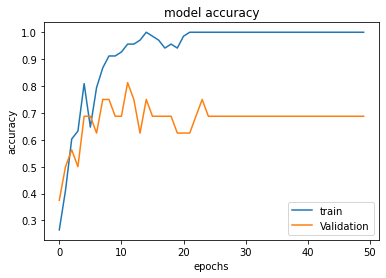

In [9]:
# vẽ lại quá trình học
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [10]:
#in sai so va do chinh xac
score = model.evaluate(validation_dataset,verbose=0)
print('Sai số : ',score[0])
print('Độ chính xác ',score[1])

Sai số :  1.3245346546173096
Độ chính xác  0.6875


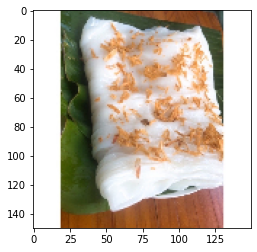

banh hoi


In [11]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/cake-test/banhuot_test.jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq=np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("banh xeo")
if(kq==1):
    print("banh da lon")
if(kq==2):
    print("banh hoi")
if(kq==3):
    print("banh uot")
    
# {'Banh xeo': 0, 'banh da lon': 1, 'banh hoi': 2, 'banh uot': 3}

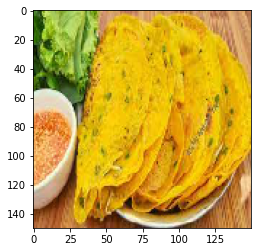

banh xeo


In [12]:
filename = "../input/cake-test/banhxeo_test.jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq=np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("banh xeo")
if(kq==1):
    print("banh da lon")
if(kq==2):
    print("banh hoi")
if(kq==3):
    print("banh uot")

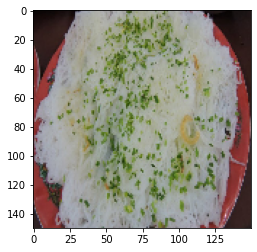

banh hoi


In [13]:
filename = "../input/testcake/banhhoi_test4.jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq=np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("banh xeo")
if(kq==1):
    print("banh da lon")
if(kq==2):
    print("banh hoi")
if(kq==3):
    print("banh uot")

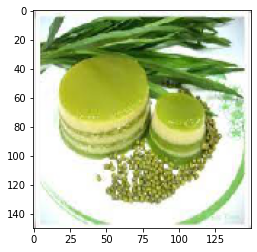

banh da lon


In [14]:
filename = "../input/banhdalon-test/banhdalon_test5.jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq=np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("banh xeo")
if(kq==1):
    print("banh da lon")
if(kq==2):
    print("banh hoi")
if(kq==3):
    print("banh uot")